In [17]:
import pandas as pd
from paths import csv_path


ID = 0

l = pd.read_csv(csv_path(id=ID, problem_name="brain", solver_name="louvain"))

In [24]:
l[l["k"] == 2]

,matrix_res,score_res,k,sample,mod_score,run_time
9,0.131356,1.0,2.0,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...",0.436012,0.005000
13,0.192034,1.0,2.0,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...",0.436012,0.004999


In [14]:
import numpy as np


l = l.loc[l["k"] == 2, :]

scores = l.mod_score
matrix_res = l.matrix_res

m = np.array(matrix_res)
s = np.array(scores)

In [15]:
gr_by_res = (
    l.groupby(l.matrix_res, group_keys=True)
    .agg({"mod_score": ["mean", "std", "max"]})
    .apply(lambda x: x)
)
gr_by_res

mod_score              
                mean std       max
matrix_res                        
0.131356    0.436012 NaN  0.436012
0.192034    0.436012 NaN  0.436012

c:\Users\basia\Desktop\Praca_Inzynierska\StatsModule\.venv\lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
c:\Users\basia\Desktop\Praca_Inzynierska\StatsModule\.venv\lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


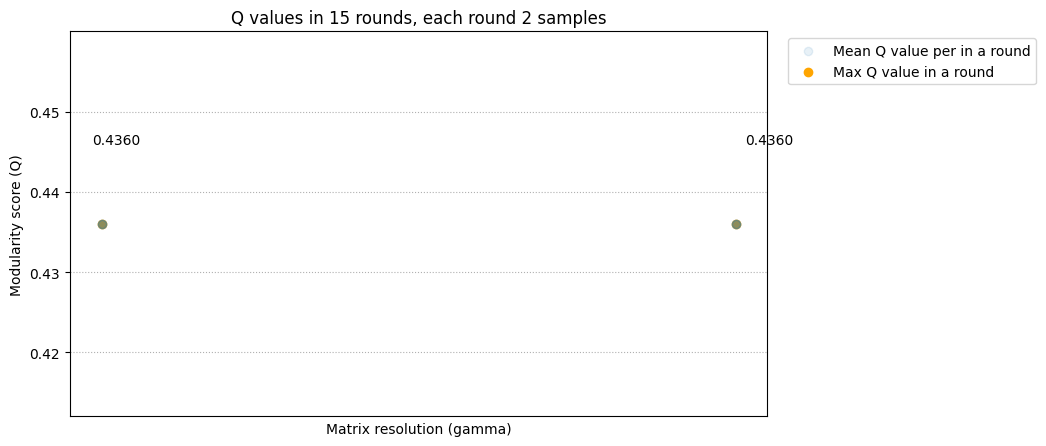

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


plt.rcParams["figure.figsize"] = (9, 5)

x_major_ticker = mpl.ticker.MultipleLocator(5)
x_minor_ticker = mpl.ticker.MultipleLocator(1)


fig, ax = plt.subplots()

ax.xaxis.set_major_locator(x_major_ticker)
ax.xaxis.set_minor_locator(x_minor_ticker)

ax.set_title("Q values in 15 rounds, each round 2 samples")
ax.set_xlabel("Matrix resolution (gamma)")
ax.set_ylabel("Modularity score (Q)")

ax.grid(which="major", linestyle=":")

# ax.set_ylim(0.35, 0.45)
# ax.set_yticks(np.arange(0.43, 0.44, 0.01))
# ax.set_xlim(1, 1.3)
# ax.set_xticks(np.arange(0.8, 1.5, step=0.05))


ax.scatter(
    gr_by_res.mod_score.index,
    gr_by_res.mod_score["mean"],
    label="Mean Q value per in a round",
    alpha=0.1,
)
ax.scatter(
    gr_by_res.mod_score.index,
    gr_by_res.mod_score["max"],
    c="orange",
    label="Max Q value in a round",
)
ax.errorbar(
    gr_by_res.mod_score.index,
    gr_by_res.mod_score["mean"],
    yerr=gr_by_res.mod_score["std"],
    fmt="o",
    alpha=0.5,
)


x_offsets = [
    0.0009 * (-1) ** (i + 1) if y > 0.425 else 0
    for i, (x, y) in enumerate(
        zip(gr_by_res.index, gr_by_res.mod_score["max"])
    )
]
y_offsets = [0.01 if x > 0.425 else -0.01 for x in gr_by_res.mod_score["max"]]
for i, (k, v) in enumerate(gr_by_res.mod_score["max"].items()):
    ax.annotate(text=f"{v:.4f}", xy=(k + x_offsets[i], v + y_offsets[i]))

ax.legend(bbox_to_anchor=(1.02, 1), loc=2)